# Code Update

Kak W., 2018-09-22

## In short:

 - We saw need to clarify structure of code
 - better document cuts
 

## Import Samples

- path: `/data/users/kakw/Resonances/LepGamma_elg_unblind_2018_09_20`
- unblinded sample: Single Electron
- with links point to `/data/users/jkunkle/Resonances/LepGamma_elg_2018_03_28/` for MC samples

### Sample Pre-selection
- Trigger: HLT_Ele27_eta2p1_WPTight_Gsf
- Overlap removal with dR<0.4, in the preference of muon over electron over photon over jets
- at least 1 photon object and only 1 electron object required
- no muons in sample
- cut-based working points
- photon: medium, pT>20  
- electron: medium, pT>10 (will move to tight)
- muon: tight, pT> 25

### Signal region cuts (e channel)

 - photon pT > 50
 - inverse Z mass cut (Width?)
 - photon passing electron veto (Pixel Seed?)
 

In [1]:
cd /home/kakw/efake/WG_Analysis/Plotting

/home/kakw/efake/WG_Analysis/Plotting


## Blinding with MET and leading photon passing CSEV

In [2]:
 %run interactiveStackTree.py --baseDir  /data/users/kakw/Resonances/LepGamma_elg_newblind_2018_09_21b \
--samplesConf Modules/Resonance.py --xsFile cross_sections/photon15.py \
--lumi 35900. --treeName UMDNTuple/EventTree --fileName tree.root --jupyt --quiet

Welcome to JupyROOT 6.10/05
-------------------------------------
 LOAD CROSS SECTION INFO
-------------------------------------
DYJetsToLL_M-50                xsec : 5.77e+03 pb Nevent : 49144274 lumi : 8.52e+03 scale :     4.21
ZGTo2LG                        xsec :      118 pb Nevent : 9321494  lumi : 7.91e+04 scale :    0.454
TTJets_DiLept                  xsec :     85.7 pb Nevent : 6094476  lumi : 7.11e+04 scale :    0.505
TTJets_SingleLeptFromT         xsec :      179 pb Nevent : 11957043 lumi : 6.69e+04 scale :    0.537
TTJets_SingleLeptFromTbar      xsec :      179 pb Nevent : 46455353 lumi :  2.6e+05 scale :    0.138
TTGJets                        xsec :      3.7 pb Nevent : 1577833  lumi : 4.27e+05 scale :   0.0841
WWTo2L2Nu                      xsec :     12.2 pb Nevent : 1        lumi :   0.0821 scale : 4.37e+05
WGToLNuG-amcatnloFXFX          xsec :      822 pb Nevent : 3235156  lumi : 3.94e+03 scale :     9.12
WGToLNuG-madgraphMLM           xsec :      405 pb Nevent : 6103

In [3]:
base = 'ph_n>=1 && el_n==1'
baseeta = base + ' && abs(ph_eta[0])<1.4'
base1 = 'ph_n==1 && el_n==1'
base1eta = base1 + ' && abs(ph_eta[0])<1.4'
a4 = '&& ph_hasPixSeed[0]==0'  #Pixel seed
b4 = '&& ph_hasPixSeed[0]==1'
ltmet = '&&met_pt<25'
gtmet = '&&met_pt>25'
phpt50 = "&&ph_pt[0]>50"
unblind = "ph_hasPixSeed[0]==1 || met_pt<25"
weight = "PUWeight*NLOWeight"

In [4]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(1)

## Fill histogram

## Blinding in TreeFilter code


met_pt : met_pt<28
Make SingleElectron hist met_pt :  (met_pt<28)*PUWeight*NLOWeight


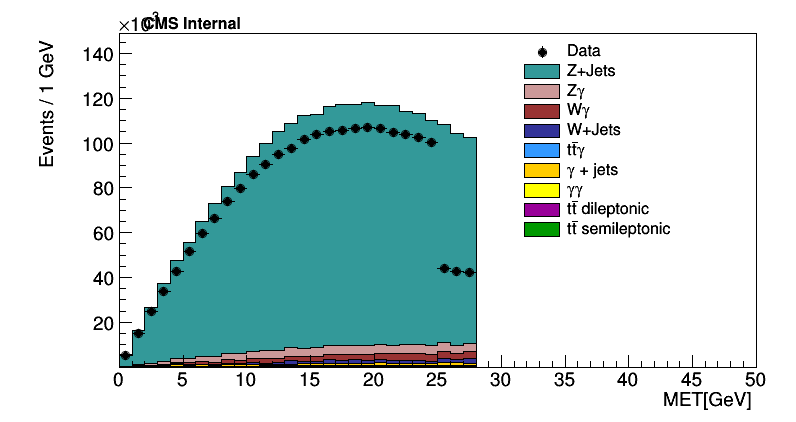

Info in <TCanvas::Print>: png file /tmp/tmpe1xpgz.png has been created


In [5]:
samples.Draw("met_pt","met_pt<28", (50,0,50), {"xlabel":"MET","unblind": True, "weight": weight})

met_pt : met_pt<28 && ph_passEleVeto[0]
Make SingleElectron hist met_pt :  (met_pt<28 && ph_passEleVeto[0])*PUWeight*NLOWeight


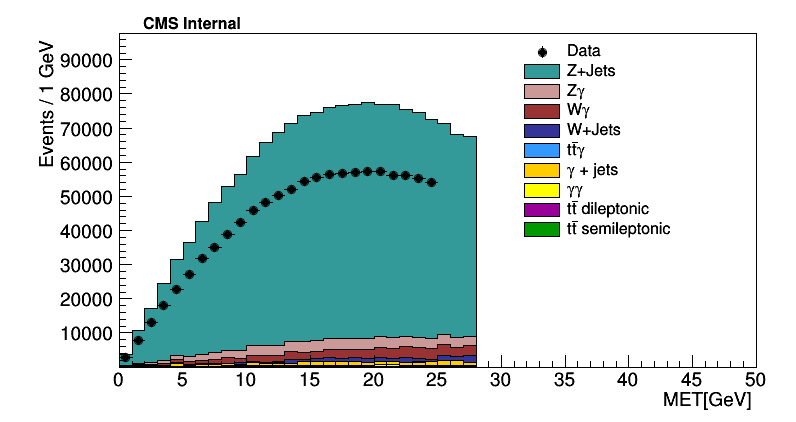

Info in <TCanvas::Print>: png file /tmp/tmpM0FuY_.png has been created


In [6]:
samples.Draw("met_pt","met_pt<28 && ph_passEleVeto[0]", (50,0,50), {"xlabel":"MET","unblind": True, "weight": weight})

met_pt : met_pt<28 && !ph_passEleVeto[0]
Make SingleElectron hist met_pt :  (met_pt<28 && !ph_passEleVeto[0])*PUWeight*NLOWeight


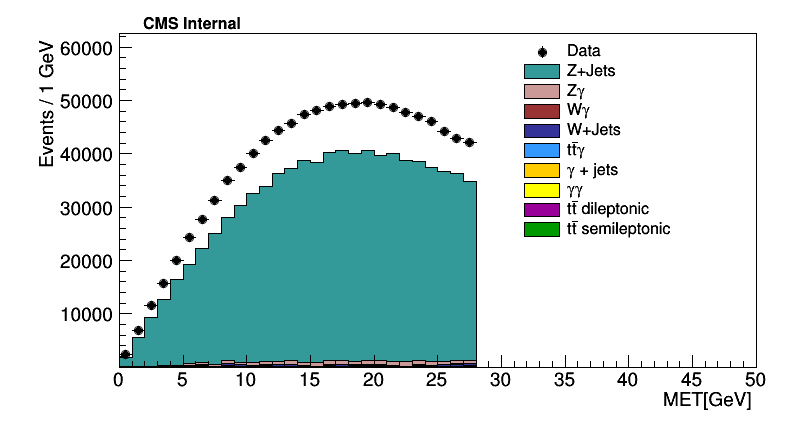

Info in <TCanvas::Print>: png file /tmp/tmpYGtY12.png has been created


In [8]:
samples.Draw("met_pt","met_pt<28 && !ph_passEleVeto[0]", (50,0,50), {"xlabel":"MET","unblind": True, "weight": weight})

### In endcap

### In barrel

## Conclusion

- Everything looks much better

documentation: http://hepcms-hn.umd.edu/~kakw/2018_09_22_new_blinding.html

#   

#   

#   

#   

# BACKUP

#   


In [9]:
!bash /home/kakw/forjupyter/jupyterconvert.sh /home/kakw/public_html/ 2018_09_22_new_blinding.ipynb

**** Following environment variables are going to be unset.
       DBS_CLIENT_CONFIG
       DBSCMD_HOME
       PYTHON_VALGRIND_SUPP
[NbConvertApp] Converting notebook 2018_09_22_new_blinding.ipynb to slides
[NbConvertApp] Writing 344597 bytes to 2018_09_22_new_blinding.slides.html
[NbConvertApp] Converting notebook 2018_09_22_new_blinding.ipynb to html
[NbConvertApp] Writing 342877 bytes to 2018_09_22_new_blinding.html
Sun Sep 23 00:17:52 EDT 2018
